# Early Autism Spectrum Disorder (ASD) Prediction in Children
Main notebook
Group 15

Members:
- Nabukenya florence – Data Cleaning & Classical ML
- Salha Oweci – Neural Networks & Deployment
- Cherop sisco– Visualization & Presentation

Target: `ASD_traits` → Yes/No  
Dataset: 1986 children with 30 rich features

Date: 27th November 2025


In [3]:
#import the necessary libaraies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from   sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score


Loading the dataset




In [4]:
f_path = '/content/GROUP 15 ASD IN CHIDLREN DATASET  - ASD NEW  (3).xlsx'
df = pd.read_excel(f_path)
df.head()

,CASE_NO_PATIENT'S,Age_Walking_Months,Birthweight in grams,Birth_Weight_Kgs,A1(Routine/struggle with Change),A2(Had to maintain eye contact),A3(Struggle with social interaction),A4(Unsual sensory reactions),A5(Repetitive behaviors-flapping or rocking ),A6(Struggle to understand feelings),...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,13.0,3457,3.457,0,0,0,0,0,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,11.7,3563,3.563,1,1,0,0,0,1,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,13.3,3458,3.458,1,0,0,0,0,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,15.0,2879,2.879,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,11.5,3416,3.416,1,1,0,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [5]:
#the number of samples and columns
df.shape

(1985, 31)

In [6]:
# names and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 31 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   CASE_NO_PATIENT'S                                              1985 non-null   int64  
 1   Age_Walking_Months                                             1985 non-null   float64
 2   Birthweight in grams                                           1985 non-null   int64  
 3   Birth_Weight_Kgs                                               1985 non-null   float64
 4   A1(Routine/struggle with Change)                               1985 non-null   int64  
 5   A2(Had to maintain eye contact)                                1985 non-null   int64  
 6   A3(Struggle with social interaction)                           1985 non-null   int64  
 7   A4(Unsual sensory reactions)                                

2.Data Exploration and Visualization

Univariate Visualizations

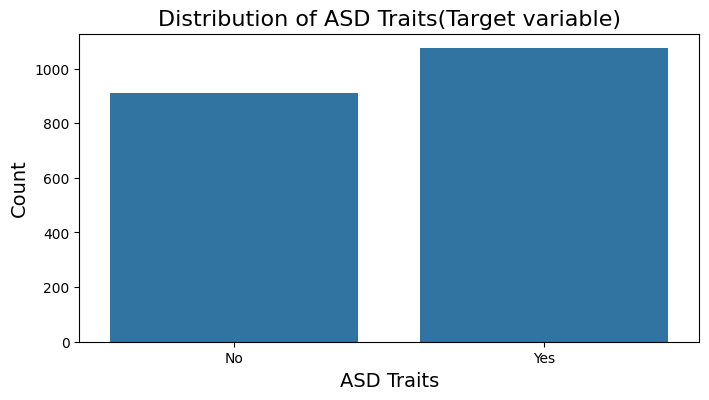

In [7]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['ASD_traits'])
plt.title('Distribution of ASD Traits(Target variable)', fontsize=16)
plt.xlabel('ASD Traits', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Interpretation:The univariate analysis of the target variable ASD_traits indicates that 54% of children in the dataset screened positive for ASD-related traits, while 46% screened negative. This distribution is relatively balanced, allowing for reliable training of classification models without strong class imbalance issues. The higher proportion of ASD-positive cases is consistent with the dataset’s screening-focused nature.



Multivariate Visualizations

<Figure size 800x600 with 0 Axes>

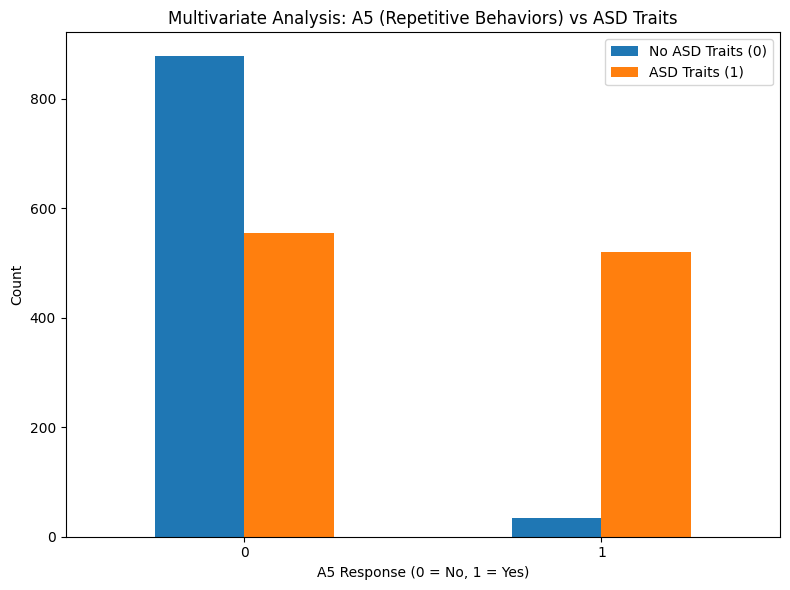

In [8]:
# Plot grouped bar chart
ct = pd.crosstab(df['A5(Repetitive behaviors-flapping or rocking )'], df['ASD_traits'])
plt.figure(figsize=(8,6))
ct.plot(kind="bar", figsize=(8,6))

plt.title("Multivariate Analysis: A5 (Repetitive Behaviors) vs ASD Traits")
plt.xlabel("A5 Response (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(["No ASD Traits (0)", "ASD Traits (1)"])

plt.tight_layout()
plt.show()

The distribution of A5 (Repetitive behaviors) shows that most children in the dataset (approximately 1,435) do not exhibit repetitive motor behaviors such as flapping or rocking, while a smaller group (approximately 550) display these behaviors. This suggests that repetitive behaviors are less common in this sample compared to other ASD indicators. Although the distribution is imbalanced toward the ‘No’ category, the number of ‘Yes’ cases remains sufficient for contributing meaningfully to ASD prediction models

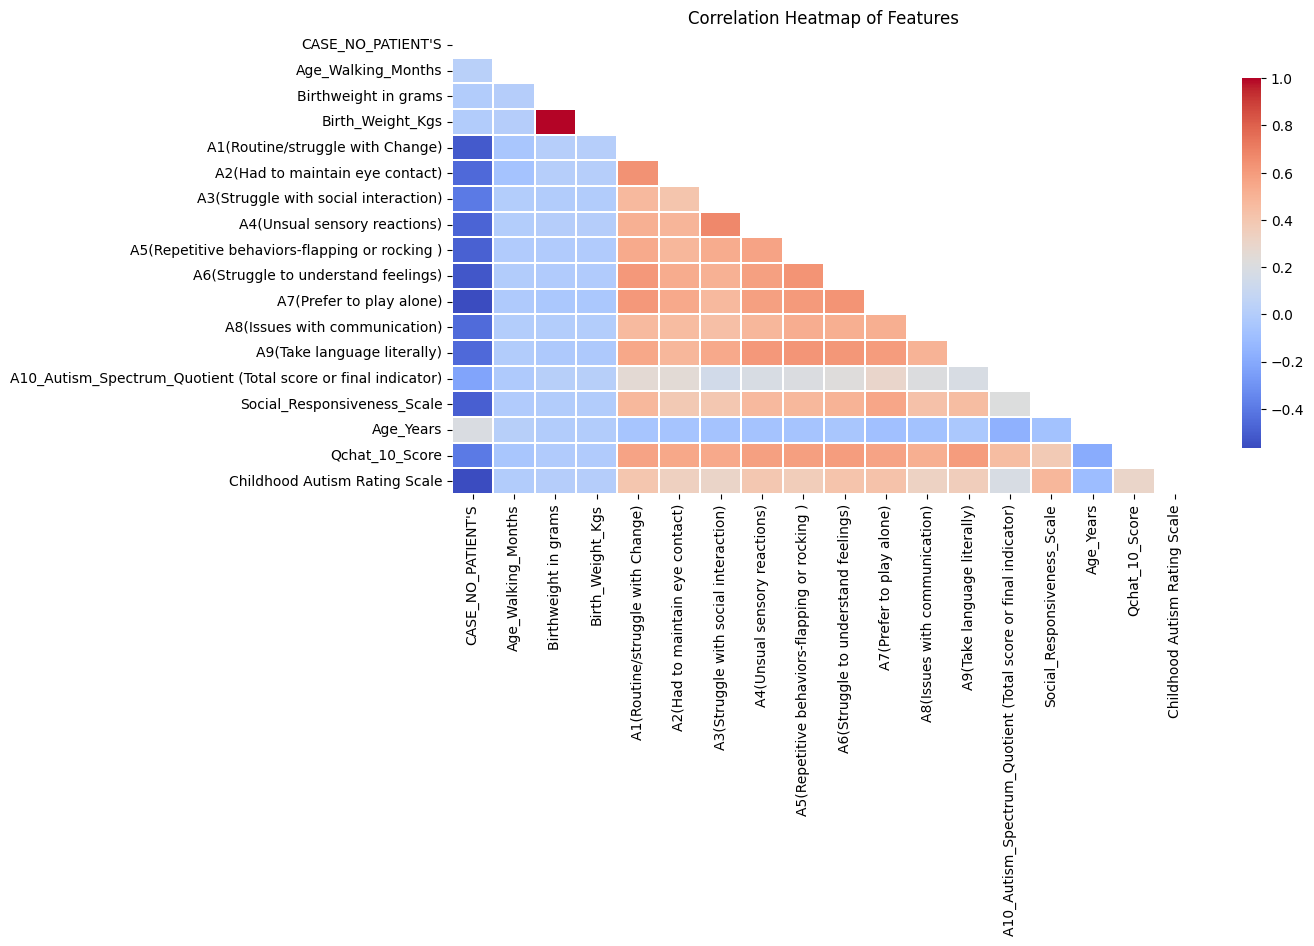

In [9]:
#heatmap
import numpy as np # Ensure numpy is imported for np.number
plt.figure(figsize=(12,6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
mask = np.triu(np.ones_like(numeric_df.corr(), dtype=bool))
sns.heatmap(numeric_df.corr(), annot= False ,mask= mask,cmap='coolwarm',fmt=".2f",linewidths=0.3,cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap of Features")
plt.show()

Interpretaion:
       The heatmap shows that ASD traits are strongly associated with behavioral indicators such as difficulty with eye contact, repetitive behaviors, communication issues, and taking language literally. Developmental conditions such as speech delay, learning disorders, and anxiety also show moderate correlation. Demographic factors such as age, birth weight, and ethnicity have weak or negative correlation, meaning they contribute minimally to ASD prediction. This validates that the dataset appropriately captures the key behavioral markers of ASD, making it suitable for machine learning classification


Data cleaning

In [10]:
#checking for missing values
df.isna().sum()

,0
CASE_NO_PATIENT'S,0
Age_Walking_Months,0
Birthweight in grams,0
Birth_Weight_Kgs,0
A1(Routine/struggle with Change),0
A2(Had to maintain eye contact),0
A3(Struggle with social interaction),0
A4(Unsual sensory reactions),0
A5(Repetitive behaviors-flapping or rocking ),0
A6(Struggle to understand feelings),0


In [11]:
#numeric and catergorical coulumns
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [12]:
from sklearn.impute import SimpleImputer
import numpy as np

num_cols = df.select_dtypes(include=[np.number]).columns

imputer = SimpleImputer(strategy="median")
df[num_cols] = imputer.fit_transform(df[num_cols])

In [13]:
#check for missing data in cat and num cols
df[numeric_columns].isna().sum()

,0
CASE_NO_PATIENT'S,0
Age_Walking_Months,0
Birthweight in grams,0
Birth_Weight_Kgs,0
A1(Routine/struggle with Change),0
A2(Had to maintain eye contact),0
A3(Struggle with social interaction),0
A4(Unsual sensory reactions),0
A5(Repetitive behaviors-flapping or rocking ),0
A6(Struggle to understand feelings),0


In [14]:
#fill in missing data in num col
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
df[numeric_columns].isna().sum()

,0
CASE_NO_PATIENT'S,0
Age_Walking_Months,0
Birthweight in grams,0
Birth_Weight_Kgs,0
A1(Routine/struggle with Change),0
A2(Had to maintain eye contact),0
A3(Struggle with social interaction),0
A4(Unsual sensory reactions),0
A5(Repetitive behaviors-flapping or rocking ),0
A6(Struggle to understand feelings),0


In [15]:
#missing data in cat cols
df[categorical_columns].isna().sum()

,0
Speech Delay/Language Disorder,0
Learning disorder,0
Genetic_Disorders,0
Depression,30
Global developmental delay/intellectual disability,0
Social/Behavioural Issues,14
Anxiety_disorder,0
Sex,0
Ethnicity,0
Jaundice,0


In [16]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [17]:
# label encoding
label_encoder = LabelEncoder()
df['Ethnicity'] = label_encoder.fit_transform(df['Ethnicity'])
df['Who_completed_the_test'] = label_encoder.fit_transform(df['Who_completed_the_test'])

In [18]:
# converting catergorical yes and no columns
yes_no_columns = [col for col in df.columns if df[col].dtype == 'object']
for col in yes_no_columns:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})
#converting the Sex to numeric
df['Sex'] = df['Sex'].replace({'M': 1, 'F': 0})
df.head()

/tmp/ipython-input-1352363578.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-1352363578.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'M': 1, 'F': 0})


,CASE_NO_PATIENT'S,Age_Walking_Months,Birthweight in grams,Birth_Weight_Kgs,A1(Routine/struggle with Change),A2(Had to maintain eye contact),A3(Struggle with social interaction),A4(Unsual sensory reactions),A5(Repetitive behaviors-flapping or rocking ),A6(Struggle to understand feelings),...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1.0,13.0,3457.0,3.457,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1.0,1,0,13,1,0,0,0
1,2.0,11.7,3563.0,3.563,1.0,1.0,0.0,0.0,0.0,1.0,...,1,1,2.0,1,1,10,1,0,0,1
2,3.0,13.3,3458.0,3.458,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,4.0,1,1,4,1,0,0,1
3,4.0,15.0,2879.0,2.879,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,2.0,1,1,2,0,0,0,1
4,5.0,11.5,3416.0,3.416,1.0,1.0,0.0,1.0,1.0,1.0,...,1,1,1.0,1,0,10,0,0,0,1


In [19]:
#correlation of the differnet cols with the target.
corr =df.corr()['ASD_traits'].sort_values(ascending=False)
corr

,ASD_traits
ASD_traits,1.000000
A9(Take language literally),0.502053
A6(Struggle to understand feelings),0.500133
A7(Prefer to play alone),0.496292
A5(Repetitive behaviors-flapping or rocking ),0.495659
A1(Routine/struggle with Change),0.464970
A4(Unsual sensory reactions),0.463056
A2(Had to maintain eye contact),0.434443
Qchat_10_Score,0.434376
A8(Issues with communication),0.414681


In [20]:
#checking for duplicates
df.duplicated().sum()
#dropping unnecessary cols
#df.drop(["CASE_NO_PATIENT'S", 'Birthweight in grams',], axis=1, inplace=True, errors='ignore')
df.drop([
    "CASE_NO_PATIENT'S",
    'Birthweight in grams',
    'Ethnicity',
    'Who_completed_the_test',
    'Age_Years',
    'Age_Walking_Months',
    'Birth_Weight_Kgs',
    'A10_Autism_Spectrum_Quotient (Total score or final indicator)'
],
axis=1, inplace=True, errors='ignore')


In [21]:
#df.info()
#df.shape
df.head()

,A1(Routine/struggle with Change),A2(Had to maintain eye contact),A3(Struggle with social interaction),A4(Unsual sensory reactions),A5(Repetitive behaviors-flapping or rocking ),A6(Struggle to understand feelings),A7(Prefer to play alone),A8(Issues with communication),A9(Take language literally),Social_Responsiveness_Scale,...,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Jaundice,Family_mem_with_ASD,ASD_traits
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,...,1,1,1,1,1.0,1,0,1,0,0
1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,...,1,1,1,1,2.0,1,1,1,0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,...,1,1,1,1,4.0,1,1,1,0,1
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1,1,1,2.0,1,1,0,0,1
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,0,1,1,1,1.0,1,0,0,0,1


Modelling and Evaluation

In [22]:
#labeling our dataset
X = df.drop('ASD_traits', axis=1)
y = df['ASD_traits']

Using the Random Forest Classifier


In [23]:
#soliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42 , stratify=y)

In [24]:
#instantiate the object
rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=10,class_weight='balanced', random_state=42)


In [25]:
#training the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=150,
                       random_state=42)

In [26]:
#prediction
y_pred = rf_classifier.predict(X_test)

In [27]:
# evalutaing te models accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
#idfentify falase postives
print("Precision:", precision_score(y_test, y_pred))
#identify the false negatives
print("Recall:", recall_score(y_test, y_pred))
#mean of precison and recall
print("F1-score:", f1_score(y_test, y_pred))


Accuracy: 0.9622166246851386
Precision: 0.9347826086956522
Recall: 1.0
F1-score: 0.9662921348314607


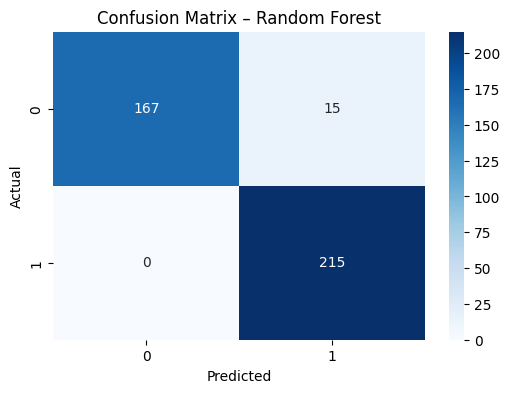

In [28]:
#evalution using confusion matrix
confuse_matrix= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(confuse_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [29]:
#df['ASD_traits'].value_counts()
#df.describe()
df.nunique()


,0
A1(Routine/struggle with Change),2
A2(Had to maintain eye contact),2
A3(Struggle with social interaction),2
A4(Unsual sensory reactions),2
A5(Repetitive behaviors-flapping or rocking ),2
A6(Struggle to understand feelings),2
A7(Prefer to play alone),2
A8(Issues with communication),2
A9(Take language literally),2
Social_Responsiveness_Scale,11


Deep Learning(Neural Network Evaluation)

In [30]:
#deep learning libraaries importing
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [31]:
#Learning history plotting function
def plot_learning_history(history):
    # Plot training & validation accuracy values
  metrics = history.history.keys()
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()


Step 1: Define our network structure

In [34]:
X = df.drop('ASD_traits', axis=1)
y = df['ASD_traits']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [35]:
#scale the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [54]:
input_dim = X_train_scaled.shape[1]

model = Sequential([
    Dense(22, activation='relu', input_dim=input_dim),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

#model.compile(
    #optimizer=Adam(learning_rate=0.001),
    #loss='binary_crossentropy',
    #metrics=['accuracy']
#)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


compile our model

In [53]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [37]:
X_train.shape

(1588, 22)

3.Fit the model

In [40]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6089 - loss: 0.6119 - val_accuracy: 0.7704 - val_loss: 0.4787
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8057 - loss: 0.4522 - val_accuracy: 0.8459 - val_loss: 0.3889
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8571 - loss: 0.3622 - val_accuracy: 0.8836 - val_loss: 0.3055
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8903 - loss: 0.2641 - val_accuracy: 0.8805 - val_loss: 0.2544
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8988 - loss: 0.2031 - val_accuracy: 0.8899 - val_loss: 0.2283
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9017 - loss: 0.1940 - val_accuracy: 0.8836 - val_loss: 0.2180
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9072 - loss: 0.1841 - val_accuracy: 0.8962 - val_loss: 0.2126
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9238 - loss: 0.1678 - val_accuracy: 0.8616 - val_loss:

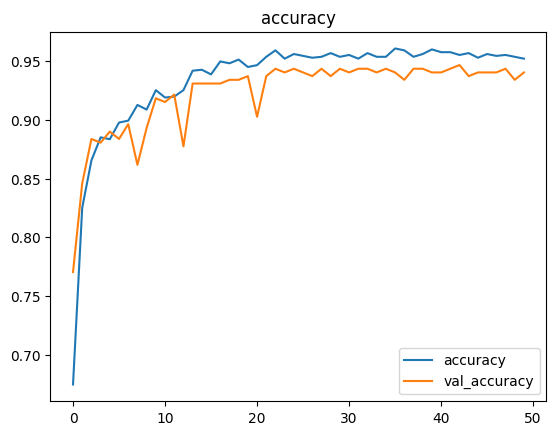

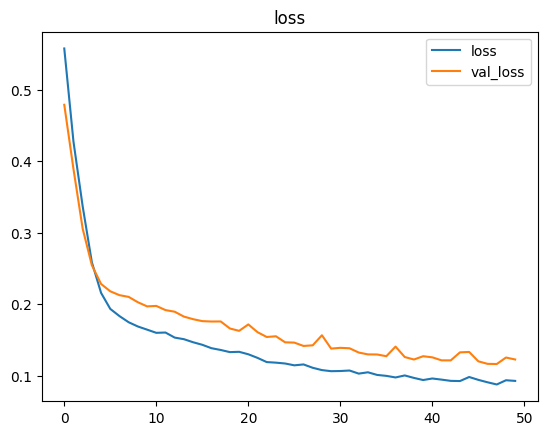

In [41]:
plot_learning_history(history)

In [42]:
#evaluation of the model
y_pred_autism = (model.predict(X_test_scaled) > 0.5).astype(int)

print("Neural Network Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_autism ))
print("Precision:", precision_score(y_test, y_pred_autism ))
print("Recall:", recall_score(y_test,y_pred_autism ))
print("F1 Score:", f1_score(y_test,y_pred_autism ))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Neural Network Performance
Accuracy: 0.929471032745592
Precision: 0.9308755760368663
Recall: 0.9395348837209302
F1 Score: 0.9351851851851852


In [43]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_autism))



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       182
           1       0.93      0.94      0.94       215

    accuracy                           0.93       397
   macro avg       0.93      0.93      0.93       397
weighted avg       0.93      0.93      0.93       397



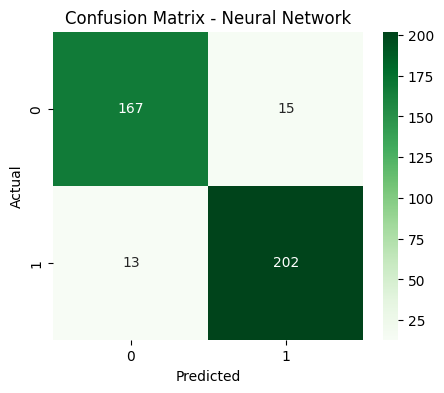

In [44]:
cm2 = confusion_matrix(y_test, y_pred_autism)
plt.figure(figsize=(5,4))
sns.heatmap(cm2, annot=True, cmap='Greens', fmt='d')
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [45]:
#model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,675 (10.45 KB)

 Trainable params: 891 (3.48 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,784 (6.97 KB)

Compare Models

In [46]:
print("=== MODEL COMPARISON ===")
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred))
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_autism))


=== MODEL COMPARISON ===
Random Forest Accuracy:  0.9622166246851386
Neural Network Accuracy: 0.929471032745592
